<a href="https://colab.research.google.com/github/pravin-raut/MachineLearning/blob/Master/dissertation/ARIMA_Currency_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 23.7 MB/s eta 0:00:00


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Read Dataset

In [4]:
df_USD_EUR=pd.read_csv('/content/drive/MyDrive/dissertation/df_USD_EUR.csv')
df_USD_EUR['Date'] = pd.to_datetime(df_USD_EUR['Date'])

df_USD_EUR=df_USD_EUR.set_index('Date')
df_USD_EUR

,Original_USD_EUR_Price
Date,
2020-01-02,1.122083
2020-01-03,1.117144
2020-01-06,1.116196
2020-01-07,1.119799
2020-01-08,1.115474
...,...
2023-06-27,1.091048
2023-06-28,1.095722
2023-06-29,1.091584


# Transformation
1. Calcualte Percent Change from Original Currency Value
2. Calulate diffrence in Percent change

In [5]:
df_USD_EUR['Original_USD_EUR_Price_Pct_Change']=df_USD_EUR['Original_USD_EUR_Price'].pct_change()
df_USD_EUR['Original_USD_EUR_Price_Pct_Change_diff']=df_USD_EUR['Original_USD_EUR_Price'].pct_change().diff()
df_USD_EUR

,Original_USD_EUR_Price,Original_USD_EUR_Price_Pct_Change,Original_USD_EUR_Price_Pct_Change_diff
Date,,,
2020-01-02,1.122083,NaN,NaN
2020-01-03,1.117144,-0.004401,NaN
2020-01-06,1.116196,-0.000848,0.003553
2020-01-07,1.119799,0.003228,0.004077
2020-01-08,1.115474,-0.003863,-0.007091
...,...,...,...
2023-06-27,1.091048,0.000349,0.005115
2023-06-28,1.095722,0.004284,0.003935
2023-06-29,1.091584,-0.003777,-0.008061


In [6]:
from statsmodels.tsa.seasonal import seasonal_decompose


# Multiplicative Decomposition
1. seasonal : This component is very close to 1 indicating the lack of strong seasonal pattern
2. Trend : This is majority of the component and data fluctuates and shows pattern
3. resid : this is almost 1 ,which says after accounting for trend and seasonality , the reamning variation are very small

,seasonal,trend,resid,Original_USD_EUR_Price
Date,,,,
2020-01-02,1.000290,1.120335,1.001270,1.122083
2020-01-03,1.000009,1.119022,0.998313,1.117144
2020-01-06,0.999667,1.118139,0.998595,1.116196
2020-01-07,1.000017,1.115987,1.003399,1.119799
2020-01-08,1.000017,1.114780,1.000605,1.115474
...,...,...,...,...
2023-06-27,1.000017,1.092982,0.998213,1.091048
2023-06-28,1.000017,1.091165,1.004159,1.095722
2023-06-29,1.000290,1.091182,1.000079,1.091584


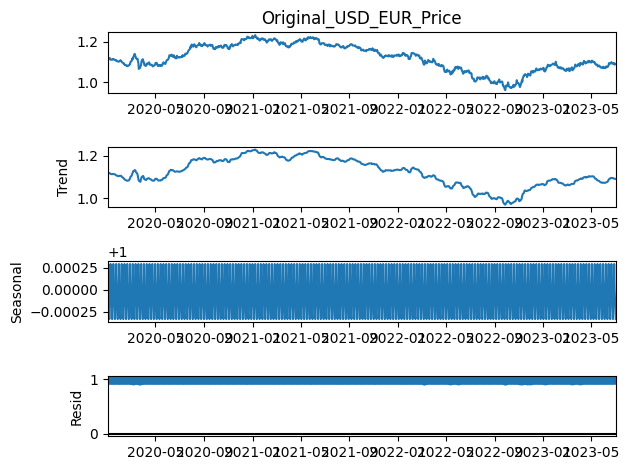

In [7]:
result_mul = seasonal_decompose(df_USD_EUR['Original_USD_EUR_Price'], model='multiplicative', extrapolate_trend='freq')
result_mul.plot()

result_mul=pd.concat([result_mul.seasonal,result_mul.trend,result_mul.resid,result_mul.observed],axis=1)
result_mul

# Additive Decomposition
1. seasonal : This component is very close to 0 indicating the lack of strong seasonal pattern
2. Trend : This is majority of the component and data fluctuates and shows pattern
3. resid : this is almost 0 ,which says after accounting for trend and seasonality , the reamning variation are very small



,seasonal,trend,resid,Original_USD_EUR_Price
Date,,,,
2020-01-02,0.000315,1.120335,0.001433,1.122083
2020-01-03,0.000007,1.119022,-0.001884,1.117144
2020-01-06,-0.000371,1.118139,-0.001573,1.116196
2020-01-07,0.000016,1.115987,0.003797,1.119799
2020-01-08,0.000033,1.114780,0.000661,1.115474
...,...,...,...,...
2023-06-27,0.000016,1.092982,-0.001950,1.091048
2023-06-28,0.000033,1.091165,0.004525,1.095722
2023-06-29,0.000315,1.091182,0.000087,1.091584


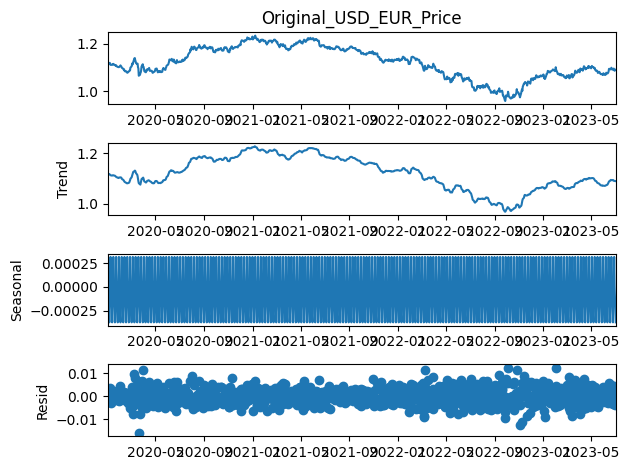

In [8]:
result_add = seasonal_decompose(df_USD_EUR['Original_USD_EUR_Price'], model='additive', extrapolate_trend='freq')
result_add.plot()
result_add_df=pd.concat([result_add.seasonal,result_add.trend,result_add.resid,result_add.observed],axis=1)
result_add_df


# Validate the data is stationary

In [9]:
from statsmodels.tsa.stattools import adfuller

def perform_adfuller(series):
    # Perform Augmented Dickey-Fuller test
    result = adfuller(series)

    # Extract test statistics and p-value
    test_statistic = result[0]
    p_value = result[1]

    # Print the results
    print("Augmented Dickey-Fuller Test:")
    print(f"Test Statistic: {test_statistic}")
    print(f"P-value: {p_value}")

    # Check the p-value against a significance level (e.g., 0.05) to determine stationarity
    if p_value <= 0.05:
        print("The time series is stationary.")
    else:
        print("The time series is non-stationary.")



#Augmented Dickey-Fuller (ADF)
1. Test Statistics: A negative value indicates the presence of stationarity, and the more negative it is, the stronger the certainty of stationarity.

2. P-Value : less than 0.05 indicate the time series is stationary which is requirement for ARIMA

In [10]:
perform_adfuller(df_USD_EUR['Original_USD_EUR_Price_Pct_Change_diff'].dropna())

Augmented Dickey-Fuller Test:
Test Statistic: -13.10310769325714
P-value: 1.6939020857387613e-24
The time series is stationary.


In [11]:
perform_adfuller(df_USD_EUR['Original_USD_EUR_Price_Pct_Change'].dropna())

Augmented Dickey-Fuller Test:
Test Statistic: -28.828344573262466
P-value: 0.0
The time series is stationary.


In [12]:
perform_adfuller(df_USD_EUR['Original_USD_EUR_Price'].dropna())

Augmented Dickey-Fuller Test:
Test Statistic: -1.2041247161151143
P-value: 0.671818851027125
The time series is non-stationary.


#Data is divided into Training and Testing Dataset
1. Training Data 2020-01-01 to 2022-12-31
2. Testing Data 2023-01-01 to Current Date




In [13]:
# Define the start and end dates for train and test data
train_start_date = pd.to_datetime('2020-01-01')
train_end_date = pd.to_datetime('2022-12-31')
test_start_date = pd.to_datetime('2023-01-01')


In [14]:
train_data_currency = df_USD_EUR[(df_USD_EUR.index >= train_start_date) & (df_USD_EUR.index <= train_end_date)]
test_data_currency = df_USD_EUR[df_USD_EUR.index >= test_start_date]


##Recalcualting Percentage Diff and DIff on Training and Testing Dataset

In [86]:
import warnings
warnings.filterwarnings("ignore")


In [87]:
train_data_currency['Original_USD_EUR_Price_Pct_Change']=train_data_currency['Original_USD_EUR_Price'].pct_change()
train_data_currency['Original_USD_EUR_Price_Pct_Change_diff']=train_data_currency['Original_USD_EUR_Price'].pct_change().diff()
train_data_currency

,Original_USD_EUR_Price,Original_USD_EUR_Price_Pct_Change,Original_USD_EUR_Price_Pct_Change_diff,lower Cur predictions,Higher Cur predictions,Cur predictions,reverse_diff,Original_USD_EUR_Price_Predicted
Date,,,,,,,,
2020-01-06,1.116196,NaN,NaN,NaN,NaN,NaN,-0.000848,1.115249
2020-01-07,1.119799,0.003228,NaN,-2771.807649,2771.807649,0.000000,-0.000848,1.114303
2020-01-08,1.115474,-0.003863,-0.007091,-1385.897710,1385.909940,0.006115,0.009343,1.124714
2020-01-09,1.111321,-0.003723,0.000140,-0.060016,0.023498,-0.018259,-0.022122,1.099833
2020-01-10,1.111111,-0.000189,0.003534,-0.032457,0.017816,-0.007321,-0.011044,1.087687
...,...,...,...,...,...,...,...,...
2022-12-26,1.066780,0.006081,0.006717,-0.019354,0.013862,-0.002746,-0.003382,1.036300
2022-12-27,1.064022,-0.002586,-0.008666,-0.013977,0.019238,0.002631,0.008711,1.045327
2022-12-28,1.063717,-0.000287,0.002298,-0.014435,0.018781,0.002173,-0.000412,1.044896


In [88]:
test_data_currency['Original_USD_EUR_Price_Pct_Change']=test_data_currency['Original_USD_EUR_Price'].pct_change()
test_data_currency['Original_USD_EUR_Price_Pct_Change_diff']=test_data_currency['Original_USD_EUR_Price'].pct_change().diff()
test_data_currency

,Original_USD_EUR_Price,Original_USD_EUR_Price_Pct_Change,Original_USD_EUR_Price_Pct_Change_diff,lower Cur predictions,Higher Cur predictions,Cur predictions,reverse_diff,Original_USD_EUR_Price_Predicted
Date,,,,,,,,
2023-01-04,1.054685,NaN,NaN,-0.017026,0.024967,0.003970,-0.012255,1.054685
2023-01-05,1.060637,0.005642,NaN,-0.021356,0.024576,0.001610,-0.010645,1.043458
2023-01-06,1.052222,-0.007934,-0.013576,-0.020980,0.028434,0.003727,0.009369,1.053235
2023-01-09,1.065632,0.012745,0.020679,-0.024977,0.029690,0.002356,-0.005577,1.047361
2023-01-10,1.073318,0.007213,-0.005532,-0.025541,0.031874,0.003166,0.015911,1.064025
...,...,...,...,...,...,...,...,...
2023-06-27,1.091048,0.000349,0.005115,-0.249940,0.269475,0.009768,0.005001,2.337335
2023-06-28,1.095722,0.004284,0.003935,-0.252183,0.271832,0.009824,0.010174,2.361114
2023-06-29,1.091584,-0.003777,-0.008061,-0.254432,0.274195,0.009881,0.014166,2.394560


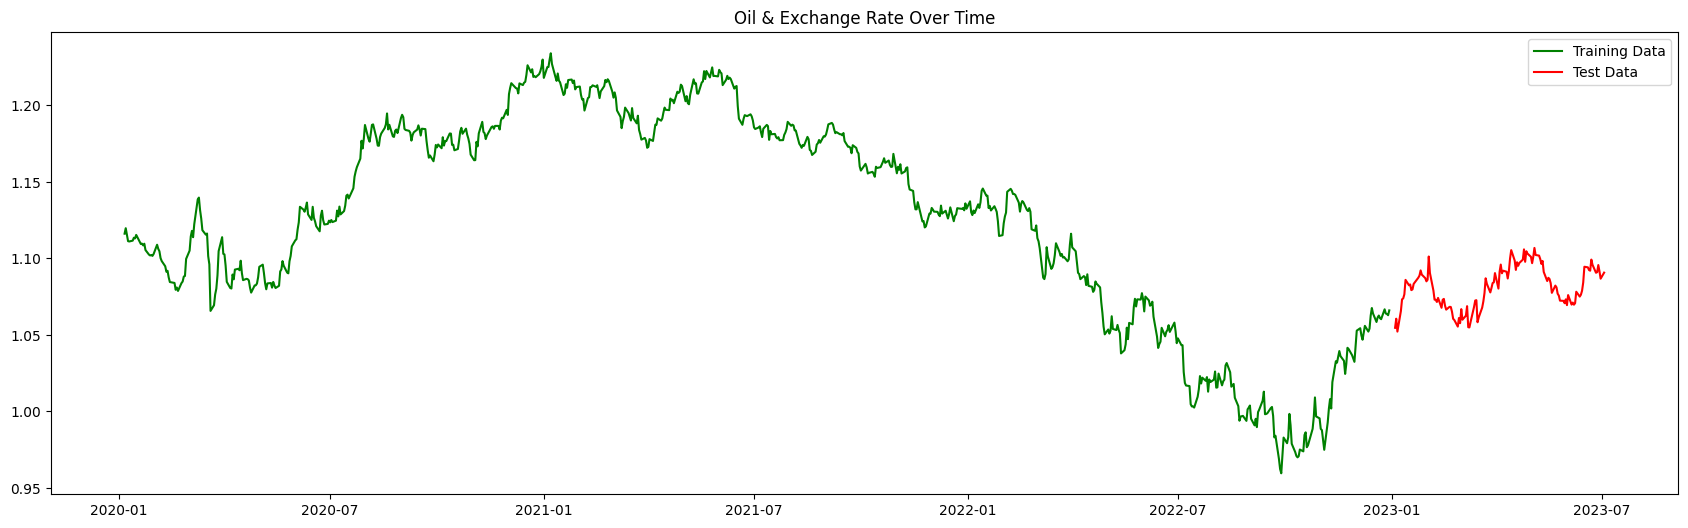

In [89]:
import matplotlib.pyplot as plt

# Plotting the entire data
plt.figure(figsize=(21, 6))

# Plotting the training data
plt.plot(train_data_currency.index, train_data_currency['Original_USD_EUR_Price'], color='green', label='Training Data')

# Plotting the test data
plt.plot(test_data_currency.index, test_data_currency['Original_USD_EUR_Price'], color='red', label='Test Data')

plt.title('Oil & Exchange Rate Over Time')
plt.legend()
plt.show()


In [90]:
print('Training data shape Currency: ', train_data_currency.shape)
print('Test data shape Currency: ', test_data_currency.shape)


Training data shape Currency:  (780, 8)
Test data shape Currency:  (129, 8)


#ACF-PACF

In [91]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

def plot_acf_values(data, lags):
    fig, ax = plt.subplots(figsize=(12, 4))
    plot_acf(data.dropna(), lags=lags, ax=ax,zero=False)
    plt.title('ACF')
    plt.show()

def plot_pacf_values(data, lags):
    fig, ax = plt.subplots(figsize=(12, 4))
    plot_pacf(data.dropna(), lags=lags, ax=ax,zero=False,alpha=0.05)
    plt.title('PACF')
    plt.show()


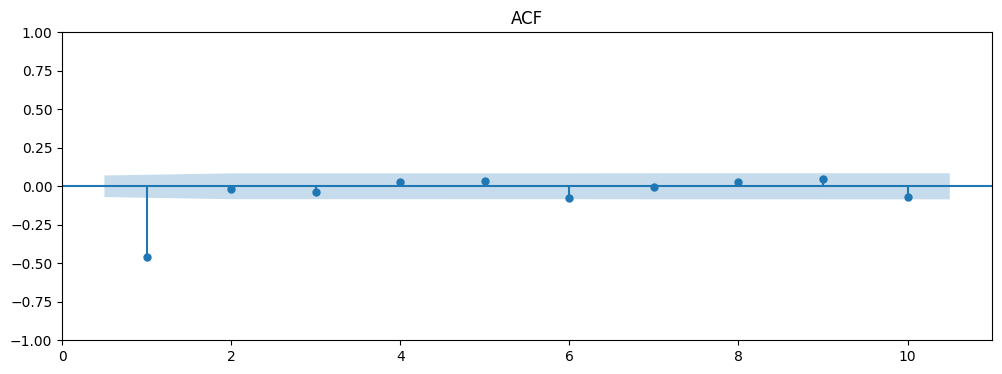

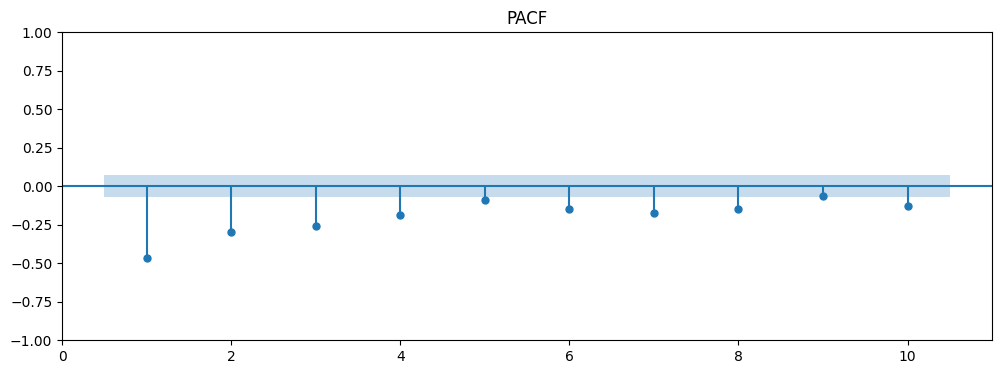

In [92]:
plot_acf_values(train_data_currency['Original_USD_EUR_Price_Pct_Change_diff'].dropna(), lags=10)
plot_pacf_values(train_data_currency['Original_USD_EUR_Price_Pct_Change_diff'].dropna(), lags=10)


#AUTO-ARIMA

## Finding P,D,Q
p ==> p is the number of autoregressive terms (AR part). It allows to incorporate the effect of past values into our model.

d==> d is the number of differences needed for stationarity.We have made data stationary already so we will have it as 0

q==> q is  moving average model uses past forecast errors, we are using 2 so that we will consider the error for last 2 days

In [93]:
from pmdarima import auto_arima

def find_auto_arima(dataframe,column,exogcolumn=None):
  model = auto_arima(dataframe[column].dropna(),
                exog=exogcolumn,
                   start_p=1, start_q=1,
                   max_p=5, max_q=5, m=0,
                   seasonal=False,start_d=0,

                   error_action='ignore',
                   suppress_warnings=True,
                   stepwise=True)
  return model

In [94]:
model = auto_arima(train_data_currency['Original_USD_EUR_Price_Pct_Change_diff'].dropna(),
                   start_p=1, start_q=1,
                      max_p=5, max_q=5, # maximum p and q
                      d=0,              # frequency of series
                      seasonal=False,   # No Seasonality
                      trace=True,
                      error_action='ignore',
                      suppress_warnings=True,
                      stepwise=True)
model.summary()

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-5948.798, Time=0.25 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-5580.513, Time=0.11 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=-5765.799, Time=0.10 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=inf, Time=0.41 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-6007.107, Time=0.48 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=-5834.935, Time=0.14 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=-6018.560, Time=0.89 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=-5886.936, Time=0.41 sec
 ARIMA(4,0,1)(0,0,0)[0]             : AIC=-5924.624, Time=0.27 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=inf, Time=1.19 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=inf, Time=0.83 sec
 ARIMA(4,0,0)(0,0,0)[0]             : AIC=-5912.040, Time=0.31 sec
 ARIMA(4,0,2)(0,0,0)[0]             : AIC=-5996.412, Time=1.71 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-5912.815, Time=1.40 sec

Best model:  ARIMA(3,0,1)(0,0,0)[0] 

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  778
Model:               SARIMAX(3, 0, 1)   Log Likelihood                3014.280
Date:                Wed, 05 Jul 2023   AIC                          -6018.560
Time:                        20:29:29   BIC                          -5995.277
Sample:                    01-08-2020   HQIC                         -6009.604
                         - 12-30-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1210      0.034      3.556      0.000       0.054       0.188
ar.L2         -0.1362      0.033     -4.155      0.000      -0.200      -0.072
ar.L3         -0.0576      0.034     -1.683      0.092      -0.125       0.009
ma.L1         -0.9441      0.017    -55.256      0.000      -0.978      -0.911
sigma2      2.503e-05   9.71e-07     25.782      0.000    2.31e-05    2.69e-05
===================================================================================
Ljung-Box (L1) (Q):                   4.95   Jarque-Bera (JB):               131.00
Prob(Q):                              0.03   Prob(JB):                         0.00
Heteroskedasticity (H):               1.64   Skew:                            -0.11
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.00
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

#ARIMA Model Fitting

In [95]:
from statsmodels.tsa.arima.model import ARIMA

def arima_model_fit(dataframe, p, d, q, exog=None):
    model = ARIMA(dataframe, order=(p,d,q), exog=exog)
    model_fit = model.fit()
    return model_fit

In [96]:
cur_model_fit=arima_model_fit(train_data_currency['Original_USD_EUR_Price_Pct_Change_diff'].dropna(),3,0,1)
cur_model_fit.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                         SARIMAX Results                                          
==================================================================================================
Dep. Variable:     Original_USD_EUR_Price_Pct_Change_diff   No. Observations:                  778
Model:                                     ARIMA(3, 0, 1)   Log Likelihood                2966.650
Date:                                    Wed, 05 Jul 2023   AIC                          -5921.299
Time:                                            20:29:31   BIC                          -5893.359
Sample:                                        01-08-2020   HQIC                         -5910.552
                                             - 12-30-2022                                         
Covariance Type:                                      opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3.359e-06   6.03e-05     -0.056      0.956      -0.000       0.000
ar.L1         -0.3134      0.070     -4.488      0.000      -0.450      -0.177
ar.L2         -0.2439      0.056     -4.330      0.000      -0.354      -0.133
ar.L3         -0.1705      0.042     -4.047      0.000      -0.253      -0.088
ma.L1         -0.4637      0.069     -6.678      0.000      -0.600      -0.328
sigma2      2.846e-05   1.17e-06     24.318      0.000    2.62e-05    3.07e-05
===================================================================================
Ljung-Box (L1) (Q):                   0.22   Jarque-Bera (JB):                59.97
Prob(Q):                              0.64   Prob(JB):                         0.00
Heteroskedasticity (H):               1.67   Skew:                            -0.06
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.36
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

1. Log Likelihood	 ==> Higher the log value better the model is performing.
2. AIC , BIC, HQIC --> This are information criteria whcih states lower the criteria better is the model.


# Plot Diagnostic Chart

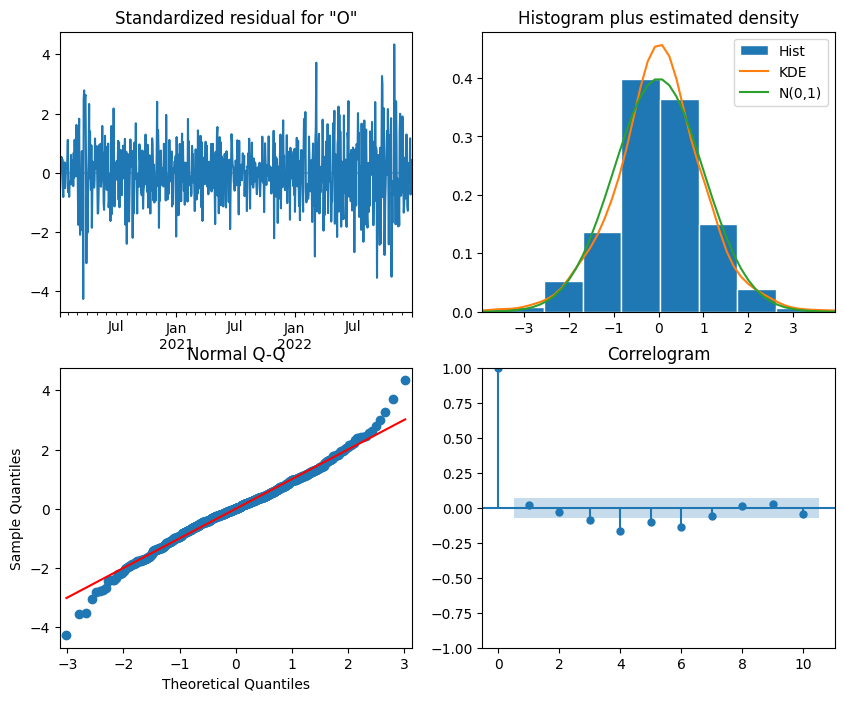

In [97]:
cur_model_fit.plot_diagnostics(figsize=(10,8))
plt.show()


### **1. Standardized Residulal** : This residual doesnt show any pattern and are randomly distributed around zero.
### **2. Histogram Plust esitmeted density** : Residuals are normally distriuted
### **3. Normal Q-Q Plot** : Most of the are along red line
### **4. Correlogram** : Its and ACF plot of residuals at diffrent lag and their is no autocorrelation seen

#Training Dataset Prediction using get_prediction
https://www.statsmodels.org/stable/generated/statsmodels.tsa.arima.model.ARIMAResults.get_prediction.html

In [98]:
# Get in-sample predictions
training_data_predictions = cur_model_fit.get_prediction(start=train_data_currency.dropna().index.min(),
                                                      end=train_data_currency.dropna().index.max(),
                                                      dynamic=False)

train_data_currency[['lower Cur predictions','Higher Cur predictions']] = training_data_predictions.conf_int()



# Create a new column for the predicted values
train_data_currency['Cur predictions'] = training_data_predictions.predicted_mean


train_data_currency

,Original_USD_EUR_Price,Original_USD_EUR_Price_Pct_Change,Original_USD_EUR_Price_Pct_Change_diff,lower Cur predictions,Higher Cur predictions,Cur predictions,reverse_diff,Original_USD_EUR_Price_Predicted
Date,,,,,,,,
2020-01-06,1.116196,NaN,NaN,NaN,NaN,NaN,-0.000848,1.115249
2020-01-07,1.119799,0.003228,NaN,NaN,NaN,NaN,-0.000848,1.114303
2020-01-08,1.115474,-0.003863,-0.007091,-0.013323,0.013316,-0.000003,0.009343,1.124714
2020-01-09,1.111321,-0.003723,0.000140,-0.008284,0.015084,0.003400,-0.022122,1.099833
2020-01-10,1.111111,-0.000189,0.003534,-0.008955,0.013227,0.002136,-0.011044,1.087687
...,...,...,...,...,...,...,...,...
2022-12-26,1.066780,0.006081,0.006717,-0.009942,0.010969,0.000514,-0.003382,1.036300
2022-12-27,1.064022,-0.002586,-0.008666,-0.015205,0.005705,-0.004750,0.008711,1.045327
2022-12-28,1.063717,-0.000287,0.002298,-0.007730,0.013181,0.002726,-0.000412,1.044896


#Testing Dataset Forecast using getForecast
https://www.statsmodels.org/stable/generated/statsmodels.tsa.arima.model.ARIMAResults.get_forecast.html

In [99]:
testing_data_forecast = cur_model_fit.get_forecast(steps=len(test_data_currency), alpha=0.05)


# Create a new dataframe to hold the forecast
test_data_currency[['lower Cur predictions','Higher Cur predictions']] = testing_data_forecast.conf_int()

# Create a new column for the forecasted values
test_data_currency['Cur predictions'] =  testing_data_forecast.predicted_mean


test_data_currency

,Original_USD_EUR_Price,Original_USD_EUR_Price_Pct_Change,Original_USD_EUR_Price_Pct_Change_diff,lower Cur predictions,Higher Cur predictions,Cur predictions,reverse_diff,Original_USD_EUR_Price_Predicted
Date,,,,,,,,
2023-01-04,1.054685,NaN,NaN,-0.013257,0.013226,-0.000015,-0.012255,1.054685
2023-01-05,1.060637,0.005642,NaN,-0.012807,0.013679,0.000436,-0.010645,1.043458
2023-01-06,1.052222,-0.007934,-0.013576,-0.013439,0.013179,-0.000130,0.009369,1.053235
2023-01-09,1.065632,0.012745,0.020679,-0.013386,0.013248,-0.000069,-0.005577,1.047361
2023-01-10,1.073318,0.007213,-0.005532,-0.013346,0.013292,-0.000027,0.015911,1.064025
...,...,...,...,...,...,...,...,...
2023-06-27,1.091048,0.000349,0.005115,-0.013323,0.013316,-0.000003,0.005001,2.337335
2023-06-28,1.095722,0.004284,0.003935,-0.013323,0.013316,-0.000003,0.010174,2.361114
2023-06-29,1.091584,-0.003777,-0.008061,-0.013323,0.013316,-0.000003,0.014166,2.394560


### AS We have not trained model on actuall currency exchange but on the diffrence of Percent change , we have received the value in same format . Now we need to follow 2 step approach in order to get the actual value
#### 1. Reverse the diffrence
#### 2. Reverse the percentage diffrence

In [100]:
def reversePct_Change(df,Original,pct_change,Predicted):

  initial_value = df[Original][0]

  #Reverse Diff
  #While making diff we Substracted the value , here we need to add it back
  df['reverse_diff'] = df[pct_change].shift(1) + df[Predicted]
  df.dropna(subset=[pct_change], inplace=True)
  first_date = df.index[0]
  df.loc[df.index == first_date, 'reverse_diff'] = df.loc[df.index == first_date, pct_change]

  #Reverse Percent Change

  df[Original+'_Predicted'] = df['reverse_diff'].add(1,fill_value=0).cumprod()*initial_value


In [101]:
reversePct_Change(train_data_currency,'Original_USD_EUR_Price','Original_USD_EUR_Price_Pct_Change','Cur predictions')


In [102]:
reversePct_Change(train_data_currency,'Original_USD_EUR_Price','Original_USD_EUR_Price_Pct_Change','Cur predictions')


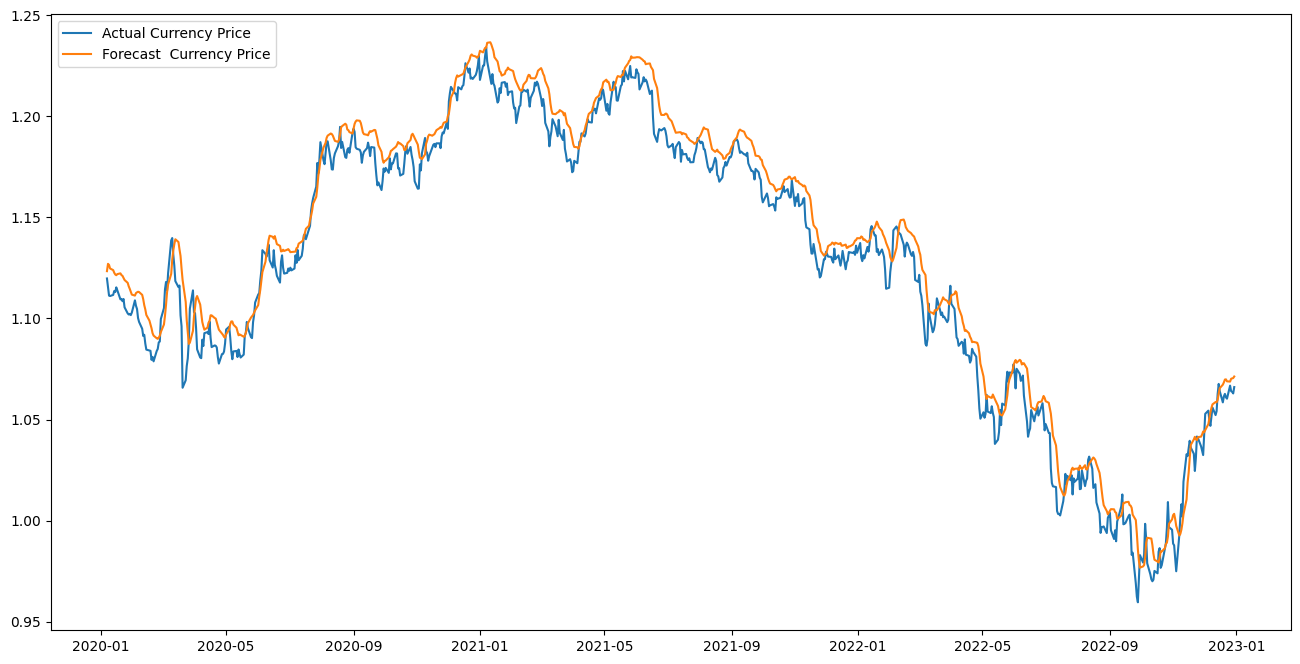

In [103]:
plt.figure(figsize=(16,8))
plt.plot(train_data_currency['Original_USD_EUR_Price'],label="Actual Currency Price")
plt.plot(train_data_currency['Original_USD_EUR_Price_Predicted'],label="Forecast  Currency Price")
plt.legend(loc="upper left")

In [104]:
reversePct_Change(test_data_currency,'Original_USD_EUR_Price','Original_USD_EUR_Price_Pct_Change','Cur predictions')


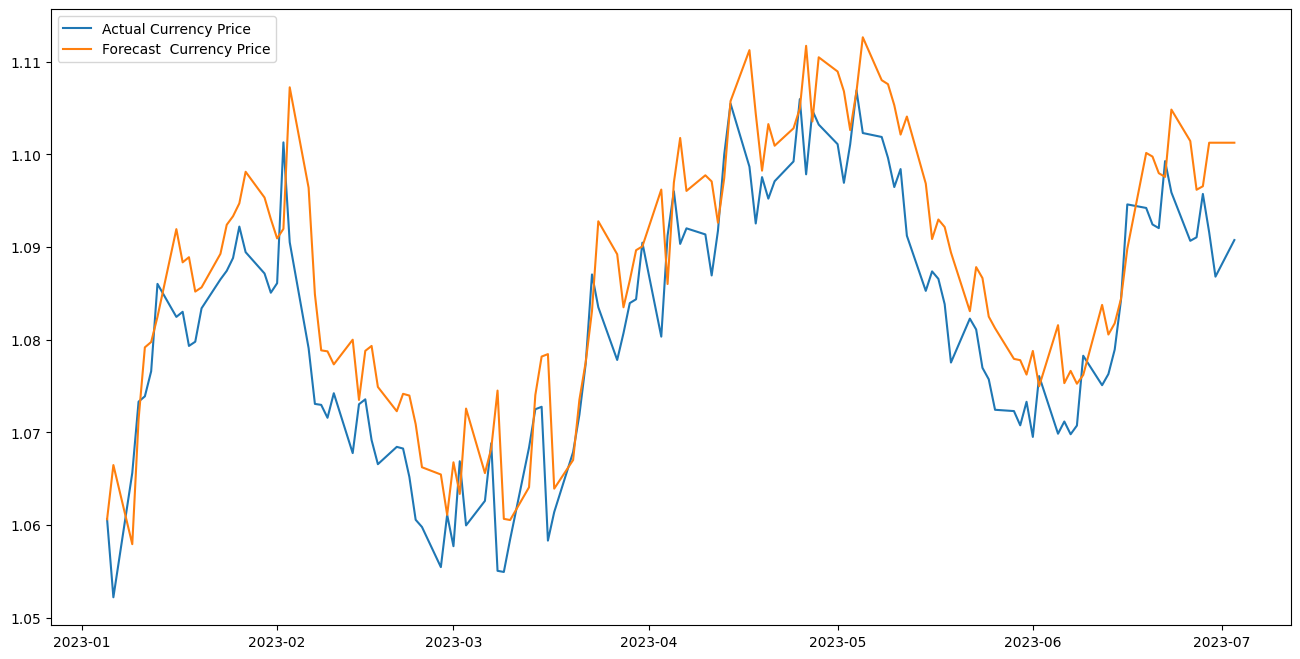

In [105]:
plt.figure(figsize=(16,8))
plt.plot(test_data_currency['Original_USD_EUR_Price'],label="Actual Currency Price")
plt.plot(test_data_currency['Original_USD_EUR_Price_Predicted'],label="Forecast  Currency Price")
plt.legend(loc="upper left")

In [106]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

def calculate_metrics(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    return {"Mean Absolute Error": mae, "Mean Squared Error": mse, "Root Mean Squared Error": rmse, "Mean Absolute Percentage Error": mape}



In [107]:
metrics = calculate_metrics(test_data_currency['Original_USD_EUR_Price'].dropna(), test_data_currency['Original_USD_EUR_Price_Predicted'].dropna())
metrics

{'Mean Absolute Error': 0.006370258910350025,
 'Mean Squared Error': 5.997943147787215e-05,
 'Root Mean Squared Error': 0.007744638886214912,
 'Mean Absolute Percentage Error': 0.5897469459517302}

### Predicting on model created using Training Dataset for future dataset wont work well as it cannot predict data for long duration as
**Training data**: 2019-01-01 to 2022-12-31

**Testing Data**: 2023-01-01 to 2023-07-04

Need to Predict for date: **2023-07-05**
AS Training dataset is older than **130 days** , it wont predict correct values with this gap , so we need to retrain model again till latest date.

#Predicting One day and Five Day Forecast on model created using Complete Dataset



In [108]:
cur_model_fit=arima_model_fit(df_USD_EUR['Original_USD_EUR_Price_Pct_Change'].dropna(),4,0,1)
cur_model_fit.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                       SARIMAX Results                                       
=============================================================================================
Dep. Variable:     Original_USD_EUR_Price_Pct_Change   No. Observations:                  912
Model:                                ARIMA(4, 0, 1)   Log Likelihood                3551.150
Date:                               Wed, 05 Jul 2023   AIC                          -7088.301
Time:                                       20:29:35   BIC                          -7054.591
Sample:                                   01-03-2020   HQIC                         -7075.432
                                        - 07-03-2023                                         
Covariance Type:                                 opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2.092e-05      0.000     -0.125      0.900      -0.000       0.000
ar.L1          0.0230      2.840      0.008      0.994      -5.544       5.590
ar.L2         -0.0114      0.134     -0.086      0.932      -0.273       0.251
ar.L3         -0.0356      0.048     -0.736      0.462      -0.130       0.059
ar.L4          0.0088      0.104      0.084      0.933      -0.195       0.212
ma.L1          0.0230      2.842      0.008      0.994      -5.547       5.593
sigma2      2.425e-05   8.61e-07     28.178      0.000    2.26e-05    2.59e-05
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               113.79
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               1.71   Skew:                            -0.13
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.71
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

# 1 day ahead

In [109]:
forecast = cur_model_fit.get_forecast(steps=1, alpha=0.05)

# Create a new DataFrame
forecast_df = pd.DataFrame()

# Add the predicted mean as a column to the DataFrame
forecast_df['predicted_diff_pct_changes'] = forecast.predicted_mean
forecast_df

,predicted_diff_pct_changes
2023-07-04,0.000375


In [110]:
predicted_prices = []

# Step 1: Reverse the differencing
last_pct_change = df_USD_EUR['Original_USD_EUR_Price_Pct_Change'].iloc[-1]
last_price = df_USD_EUR['Original_USD_EUR_Price'].iloc[-1]

for date, row in forecast_df.iterrows():
    predicted_diff_pct_change = row['predicted_diff_pct_changes']
    predicted_pct_change = last_pct_change + predicted_diff_pct_change

    # Step 2: Reverse the percentage change
    predicted_price = last_price * (1 + predicted_pct_change)

    # Store the predicted price for this step
    predicted_prices.append(predicted_price)

    # Update last_pct_change and last_price for the next iteration
    last_pct_change = predicted_pct_change
    last_price = predicted_price

# Assign the predicted prices to a new column in the DataFrame
forecast_df['predicted_prices'] = predicted_prices
forecast_df

,predicted_diff_pct_changes,predicted_prices
2023-07-04,0.000375,1.095122


# 5 Day Ahead

In [111]:
forecast = cur_model_fit.get_forecast(steps=5, alpha=0.05)

# Create a new DataFrame
forecast_df = pd.DataFrame()

# Add the predicted mean as a column to the DataFrame
forecast_df['predicted_diff_pct_changes'] = forecast.predicted_mean
forecast_df

,predicted_diff_pct_changes
2023-07-04,0.000375
2023-07-05,0.000069
2023-07-06,-0.000192
2023-07-07,-0.000008
2023-07-10,-0.000018


In [112]:
predicted_prices = []

# Step 1: Reverse the differencing
last_pct_change = df_USD_EUR['Original_USD_EUR_Price_Pct_Change'].iloc[-1]
last_price = df_USD_EUR['Original_USD_EUR_Price'].iloc[-1]

for date, row in forecast_df.iterrows():
    predicted_diff_pct_change = row['predicted_diff_pct_changes']
    predicted_pct_change = last_pct_change + predicted_diff_pct_change

    # Step 2: Reverse the percentage change
    predicted_price = last_price * (1 + predicted_pct_change)

    # Store the predicted price for this step
    predicted_prices.append(predicted_price)

    # Update last_pct_change and last_price for the next iteration
    last_pct_change = predicted_pct_change
    last_price = predicted_price

forecast_df['predicted_prices'] = predicted_prices
forecast_df

,predicted_diff_pct_changes,predicted_prices
2023-07-04,0.000375,1.095122
2023-07-05,0.000069,1.099586
2023-07-06,-0.000192,1.103857
2023-07-07,-0.000008,1.108136
2023-07-10,-0.000018,1.112412
